In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/GiveMeSomeCredit/Data Dictionary.xls
/kaggle/input/GiveMeSomeCredit/cs-training.csv
/kaggle/input/GiveMeSomeCredit/sampleEntry.csv
/kaggle/input/GiveMeSomeCredit/cs-test.csv


# Import Lib and Data

In [32]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

import time
import os

In [33]:
train_df = pd.read_csv("../input/GiveMeSomeCredit/cs-training.csv")
test_df = pd.read_csv("../input/GiveMeSomeCredit/cs-test.csv")

# Perp data

In [34]:
train_df = train_df.drop(columns = ['Unnamed: 0'])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [64]:
test_df

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
101498,101499,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,101500,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,101501,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101501,101502,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


# Data Exploration

In [35]:
pd.DataFrame({'Null Values of train data':train_df.isnull().sum(),
                'Ratio':round(train_df.isnull().sum()/len(train_df)*100,2)
             })

,Null Values of train data,Ratio
SeriousDlqin2yrs,0,0.00
RevolvingUtilizationOfUnsecuredLines,0,0.00
age,0,0.00
NumberOfTime30-59DaysPastDueNotWorse,0,0.00
DebtRatio,0,0.00
MonthlyIncome,29731,19.82
NumberOfOpenCreditLinesAndLoans,0,0.00
NumberOfTimes90DaysLate,0,0.00
NumberRealEstateLoansOrLines,0,0.00
NumberOfTime60-89DaysPastDueNotWorse,0,0.00


We found the MonthlyIncome and NumberofDependents have 29731 (19.82%) and 3924 (2.61%) null values respectively

In [36]:
# pd.DataFrame({'Null Values of test data':test_df.isnull().sum(),
#                 'Ratio':round(test_df.isnull().sum()/len(test_df)*100,2)
#              })

In [37]:
train_df.SeriousDlqin2yrs.mean()

0.06684

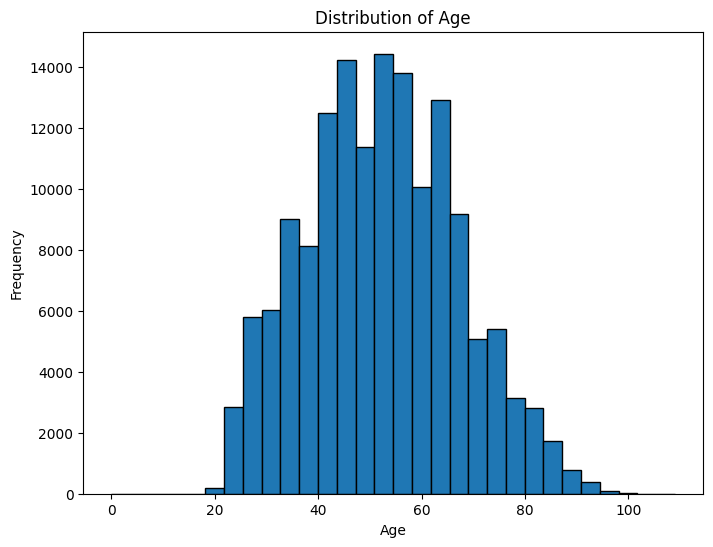

In [38]:
# Example: Histogram of 'age' column
plt.figure(figsize=(8, 6))
plt.hist(train_df['age'], bins=30, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

Text(0.5, 1.0, 'SeriousDlqin2yrs = 1')

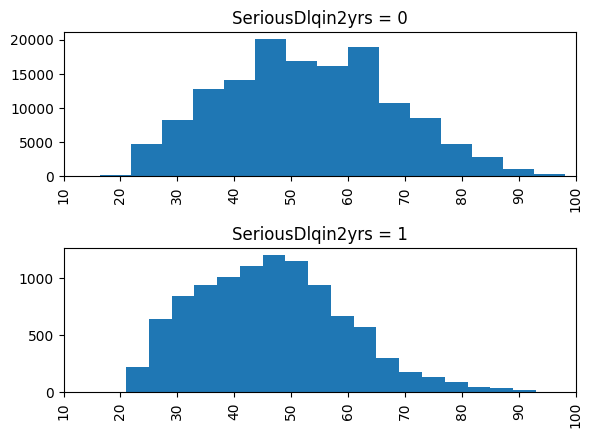

In [39]:
age = train_df['age'].hist(by=train_df['SeriousDlqin2yrs'], bins=20, layout=(2,1))
age[0].set_xlim((10,100))
age[0].set_title('SeriousDlqin2yrs = 0')

age[1].set_xlim((10,100))
age[1].set_title('SeriousDlqin2yrs = 1')

In [40]:
train_df.DebtRatio.describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

There are someone owe 329,664 times what they own.

In [41]:
train_df.DebtRatio.quantile([.975])

0.975    3489.025
Name: DebtRatio, dtype: float64

2.5% of clients owe around 3490 or more times what they own so we need to check that there are outliers or not?

In [42]:
train_df[train_df['DebtRatio'] > 3489.025 ][['SeriousDlqin2yrs','MonthlyIncome']].describe()

,SeriousDlqin2yrs,MonthlyIncome
count,3750.000000,185.000000
mean,0.064267,0.064865
std,0.245260,0.246956
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


For the people who have monthly income in this 2.5%, only 185 people have values for their monthly incomes and the values are either 0 or 1.

In [43]:
train_df[(train_df['DebtRatio'] > 3489.025) & (train_df['SeriousDlqin2yrs'] == train_df['MonthlyIncome'])].shape[0]

164

There are 164 out of these 185 people who are of two different types, 
* First with no monthly income and does not default.
* Second with monthly income and does default.

We can conclude these entries must be data-entry errors, so we will remove them from our model.

In [44]:
train_df.groupby('NumberOfTimes90DaysLate').NumberOfTimes90DaysLate.count()

NumberOfTimes90DaysLate
0     141662
1       5243
2       1555
3        667
4        291
5        131
6         80
7         38
8         21
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       264
Name: NumberOfTimes90DaysLate, dtype: int64

It is interesting to note that there are no one who is 90 or more days past due between 17 and 96 times but more 95 have around 300 people.

In [45]:
train_df[train_df['NumberOfTimes90DaysLate'] > 95][['SeriousDlqin2yrs','NumberOfTime60-89DaysPastDueNotWorse','NumberOfTime30-59DaysPastDueNotWorse','NumberOfTimes90DaysLate']].describe()

,SeriousDlqin2yrs,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate
count,269.000000,269.000000,269.000000,269.000000
mean,0.546468,97.962825,97.962825,97.962825
std,0.498764,0.270628,0.270628,0.270628
min,0.000000,96.000000,96.000000,96.000000
25%,0.000000,98.000000,98.000000,98.000000
50%,1.000000,98.000000,98.000000,98.000000
75%,1.000000,98.000000,98.000000,98.000000
max,1.000000,98.000000,98.000000,98.000000


There are around 300 people are late (30-59 days,60-89 days,and 90+ days) for 96/98 times.So we don't want to throw away this data.

Defined as ratio of the total amount of money owed to total credit limit distribution of values is right-skewed, consider removing outliers.
So it shouldn't get much above 1. First let's look at values close to 1 and see at what rate they're defaulting. We start with 0.9 to 4.0

In [46]:
train_df[train_df['RevolvingUtilizationOfUnsecuredLines'] > 10].SeriousDlqin2yrs.describe()

count    241.000000
mean       0.070539
std        0.256587
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: SeriousDlqin2yrs, dtype: float64

In [47]:
train_df[(train_df['RevolvingUtilizationOfUnsecuredLines'] > .9) & (train_df['RevolvingUtilizationOfUnsecuredLines'] <= 4)].SeriousDlqin2yrs.describe()


count    19805.000000
mean         0.225347
std          0.417821
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: SeriousDlqin2yrs, dtype: float64

In [48]:
train_df[(train_df['RevolvingUtilizationOfUnsecuredLines'] > 4) & (train_df['RevolvingUtilizationOfUnsecuredLines'] <= 10)].SeriousDlqin2yrs.describe()

count    23.000000
mean      0.260870
std       0.448978
min       0.000000
25%       0.000000
50%       0.000000
75%       0.500000
max       1.000000
Name: SeriousDlqin2yrs, dtype: float64

There are 20,000 people in 23 records are defaulting at a rate of almost 1 in 4. This is important! we go even higher, and consider >10 ...

In [49]:
train_df[train_df['RevolvingUtilizationOfUnsecuredLines'] > 13].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,238.000000,238.000000,238.000000,238.000000,238.000000,170.000000,238.000000,238.000000,238.000000,238.000000,225.000000
mean,0.058824,3608.797826,50.634454,0.163866,579.117900,8520.041176,5.689076,0.071429,1.176471,0.071429,0.693333
std,0.235790,5140.423232,14.617658,0.522123,1782.962163,6606.889618,3.032170,0.580214,1.064558,0.542637,1.043346
min,0.000000,14.000000,24.000000,0.000000,0.000800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,951.000000,39.000000,0.000000,0.216587,4608.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2023.500000,48.000000,0.000000,0.391176,7000.000000,5.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,4128.750000,62.000000,0.000000,82.250000,10178.750000,7.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,87.000000,3.000000,21395.000000,44472.000000,21.000000,8.000000,9.000000,7.000000,4.000000


These 241 people are not defaulting any more than anyone else, despite some of them owing hundreds of thousands of times their credit limits. These seem to be inconsistent with the rest of the data, so we can remove them from our model.

Filling missing data

In [50]:
from sklearn.linear_model import LinearRegression
not_missing = train_df.dropna()
target = 'MonthlyIncome'
predictors = [c for c in list(not_missing) if c not in [target, 'Unnamed: 0','SeriousDlqin2yrs']]
X_data = not_missing[predictors]
y_data = not_missing[target]
regr = LinearRegression().fit(X_data, y_data)

In [51]:
regr.score(X_data, y_data)

0.02201505632577072

# Datasets

In [52]:
# Median Fill, Outliers Removed
removed_debt_outliers = train_df.drop(train_df[train_df['DebtRatio'] > 3489.025].index)
removed_debt_outliers = removed_debt_outliers.fillna(removed_debt_outliers.median())

In [53]:
# Removed utilization outliers
dfus = removed_debt_outliers.drop(removed_debt_outliers[removed_debt_outliers['RevolvingUtilizationOfUnsecuredLines'] > 13].index)

In [54]:
# Removed 98s
dfn98 = dfus.copy()
dfn98.loc[dfn98['NumberOfTime30-59DaysPastDueNotWorse'] > 90, 'NumberOfTime30-59DaysPastDueNotWorse'] = 18
dfn98.loc[dfn98['NumberOfTime60-89DaysPastDueNotWorse'] > 90, 'NumberOfTime60-89DaysPastDueNotWorse'] = 18
dfn98.loc[dfn98['NumberOfTimes90DaysLate'] > 90, 'NumberOfTimes90DaysLate'] = 18

# Model Testing

In [55]:
class Tester():
    def __init__(self, target):
        self.target = target
        self.datasets = {}
        self.models = {}
        self.cache = {} # we added a simple cache to speed things up

    def addDataset(self, name, df):
        self.datasets[name] = df.copy()

    def addModel(self, name, model):
        self.models[name] = model
        
    def clearModels(self):
        self.models = {}

    def clearCache(self):
        self.cache = {}
    
    def testModelWithDataset(self, m_name, df_name, sample_len, cv):
        if (m_name, df_name, sample_len, cv) in self.cache:
            return self.cache[(m_name, df_name, sample_len, cv)]

        clf = self.models[m_name]
        
        if not sample_len: 
            sample = self.datasets[df_name]
        else: sample = self.datasets[df_name].sample(sample_len)
            
        X = sample.drop([self.target], axis=1)
        Y = sample[self.target]

        s = cross_validate(clf, X, Y, scoring=['roc_auc'], cv=cv, n_jobs=-1)
        self.cache[(m_name, df_name, sample_len, cv)] = s

        return s

    def runTests(self, sample_len=80000, cv=4):
        # Tests the added models on all the added datasets
        scores = {}
        for m_name in self.models:
            for df_name in self.datasets:
                # print('Testing %s' % str((m_name, df_name)), end='')
                start = time.time()

                score = self.testModelWithDataset(m_name, df_name, sample_len, cv)
                scores[(m_name, df_name)] = score
                
                end = time.time()
                
                # print(' -- %0.2fs ' % (end - start))

        print('--- Top 10 Results ---')
        for score in sorted(scores.items(), key=lambda x: -1 * x[1]['test_roc_auc'].mean())[:10]:
            auc = score[1]['test_roc_auc']
            print("%s --> AUC: %0.4f (+/- %0.4f)" % (str(score[0]), auc.mean(), auc.std()))


In [56]:
tester = Tester('SeriousDlqin2yrs')
# You can add datasets like this:
tester.addDataset('Drop Missing', train_df.dropna())

# And models like this:
rfc = RandomForestClassifier(n_estimators=15, max_depth = 6, random_state=0)
tester.addModel('Simple Random Forest', rfc)
tester.addModel('Simple SVM', svm.LinearSVC())

# You can then use it to run the tests
tester.runTests()

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


--- Top 10 Results ---
('Simple Random Forest', 'Drop Missing') --> AUC: 0.8451 (+/- 0.0065)
('Simple SVM', 'Drop Missing') --> AUC: 0.5721 (+/- 0.0370)


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [57]:
tester.addDataset('Median Fill', train_df.fillna(train_df.median()))
tester.addDataset('Median Fill, Outliers Removed', removed_debt_outliers)
tester.addDataset('Removed 98s', dfn98)
tester.addDataset('Removed utilization outliers', dfus)

tester.runTests()

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

--- Top 10 Results ---
('Simple Random Forest', 'Median Fill, Outliers Removed') --> AUC: 0.8602 (+/- 0.0032)
('Simple Random Forest', 'Removed 98s') --> AUC: 0.8594 (+/- 0.0042)
('Simple Random Forest', 'Removed utilization outliers') --> AUC: 0.8587 (+/- 0.0043)
('Simple Random Forest', 'Median Fill') --> AUC: 0.8577 (+/- 0.0030)
('Simple Random Forest', 'Drop Missing') --> AUC: 0.8451 (+/- 0.0065)
('Simple SVM', 'Removed 98s') --> AUC: 0.6402 (+/- 0.1077)
('Simple SVM', 'Removed utilization outliers') --> AUC: 0.5976 (+/- 0.0676)
('Simple SVM', 'Drop Missing') --> AUC: 0.5721 (+/- 0.0370)
('Simple SVM', 'Median Fill') --> AUC: 0.5500 (+/- 0.0628)
('Simple SVM', 'Median Fill, Outliers Removed') --> AUC: 0.5449 (+/- 0.0439)


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Random Forests

In [58]:
for i in range(5,10):
    for j in range(10,20):
        rfc = RandomForestClassifier(n_estimators=j,max_depth = i, random_state=0)
        tester.addModel('Random Forest '+'d: '+str(i)+' est: '+str(j)  ,rfc)

tester.runTests()

--- Top 10 Results ---
('Random Forest d: 9 est: 17', 'Removed 98s') --> AUC: 0.8669 (+/- 0.0019)
('Random Forest d: 8 est: 11', 'Removed 98s') --> AUC: 0.8669 (+/- 0.0021)
('Random Forest d: 9 est: 18', 'Median Fill, Outliers Removed') --> AUC: 0.8656 (+/- 0.0019)
('Random Forest d: 9 est: 19', 'Removed utilization outliers') --> AUC: 0.8647 (+/- 0.0033)
('Random Forest d: 6 est: 17', 'Removed utilization outliers') --> AUC: 0.8643 (+/- 0.0044)
('Random Forest d: 7 est: 19', 'Removed 98s') --> AUC: 0.8640 (+/- 0.0024)
('Random Forest d: 8 est: 18', 'Removed 98s') --> AUC: 0.8640 (+/- 0.0015)
('Random Forest d: 9 est: 15', 'Removed utilization outliers') --> AUC: 0.8639 (+/- 0.0010)
('Random Forest d: 8 est: 11', 'Median Fill, Outliers Removed') --> AUC: 0.8639 (+/- 0.0022)
('Random Forest d: 7 est: 18', 'Median Fill, Outliers Removed') --> AUC: 0.8638 (+/- 0.0043)


# K-Nearest Neighbors

In [59]:
'''
from sklearn.neighbors import KNeighborsClassifier

tester.clearModels()

for i in range(5, 10):
    neigh = KNeighborsClassifier(n_neighbors=i)
    tester.addModel('KNN k=%d' % i, neigh)
    
tester.runTests(50000)
'''

"\nfrom sklearn.neighbors import KNeighborsClassifier\n\ntester.clearModels()\n\nfor i in range(5, 10):\n    neigh = KNeighborsClassifier(n_neighbors=i)\n    tester.addModel('KNN k=%d' % i, neigh)\n    \ntester.runTests(50000)\n"

# Submission

In [63]:
#Prediction
df_x_test = test_df.drop(columns={'Unnamed: 0','age','SeriousDlqin2yrs'})
pred = rfc.predict_proba(df_x_test)[:,1]

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [58]:
for i in range(5,10):
    for j in range(10,20):
        rfc = RandomForestClassifier(n_estimators=j,max_depth = i, random_state=0)
        tester.addModel('Random Forest '+'d: '+str(i)+' est: '+str(j)  ,rfc)

tester.runTests()

--- Top 10 Results ---
('Random Forest d: 9 est: 17', 'Removed 98s') --> AUC: 0.8669 (+/- 0.0019)
('Random Forest d: 8 est: 11', 'Removed 98s') --> AUC: 0.8669 (+/- 0.0021)
('Random Forest d: 9 est: 18', 'Median Fill, Outliers Removed') --> AUC: 0.8656 (+/- 0.0019)
('Random Forest d: 9 est: 19', 'Removed utilization outliers') --> AUC: 0.8647 (+/- 0.0033)
('Random Forest d: 6 est: 17', 'Removed utilization outliers') --> AUC: 0.8643 (+/- 0.0044)
('Random Forest d: 7 est: 19', 'Removed 98s') --> AUC: 0.8640 (+/- 0.0024)
('Random Forest d: 8 est: 18', 'Removed 98s') --> AUC: 0.8640 (+/- 0.0015)
('Random Forest d: 9 est: 15', 'Removed utilization outliers') --> AUC: 0.8639 (+/- 0.0010)
('Random Forest d: 8 est: 11', 'Median Fill, Outliers Removed') --> AUC: 0.8639 (+/- 0.0022)
('Random Forest d: 7 est: 18', 'Median Fill, Outliers Removed') --> AUC: 0.8638 (+/- 0.0043)


In [ ]:
output = pd.DataFrame({'Id': df_test['Unnamed: 0'],'Probability': pred})
output.to_csv('submission.csv', index=False)